# Classification Experiments

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import heatmap
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

## Gender

### Nouns, Adjectives, Both : split data into train and test  

In [5]:
df_nouns_we = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv').drop(columns=["number"])
df_adj_we = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv').drop(columns = "number")
df_both_we = pd.concat([df_nouns_we, df_adj_we], ignore_index=True)

# target : gender
Y_gd_N = df_nouns_we["gender"]
Y_gd_A = df_adj_we["gender"]
Y_gd_both = df_both_we["gender"]

# features : word embeddings dimensions
X_gd_N = df_nouns_we.drop(columns=["Word", "gender"])
X_gd_A = df_adj_we.drop(columns=["Word", "gender"])
X_gd_both = df_both_we.drop(columns = ["Word", "gender"] )

# split data into train and test sets
X_gd_N_train, X_gd_N_test, Y_gd_N_train, Y_gd_N_test = train_test_split(X_gd_N, Y_gd_N, test_size=0.2, random_state=42)
X_gd_A_train, X_gd_A_test, Y_gd_A_train, Y_gd_A_test = train_test_split(X_gd_A, Y_gd_A, test_size=0.2, random_state=42)
X_gd_both_train, X_gd_both_test, Y_gd_both_train, Y_gd_both_test = train_test_split(X_gd_both, Y_gd_both, test_size=0.2, random_state=42)

In [6]:
df_nouns_we.head()

,Word,0,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,gender
0,abaisse,4.652041,-4.028067,0.883202,4.782082,-2.294611,-3.894453,-0.810279,-0.713933,4.819906,...,5.088566,-1.768522,0.557448,-1.204734,-5.865204,-7.542219,-4.662949,-0.546076,-1.836027,feminine
1,abandonnée,3.936752,1.365095,0.601899,-3.841945,0.137241,-6.720108,-4.014627,-0.164519,-4.163124,...,0.635822,-1.122231,-4.691674,-1.861967,-7.399371,-3.871466,-4.995701,4.840463,-0.697731,feminine
2,abattue,5.501807,0.974496,1.963397,-0.096684,-0.317693,-5.214660,-1.325345,1.782016,2.419068,...,1.049096,-1.418699,-2.060775,-4.221079,-9.340311,-6.799405,-3.366512,-1.183914,-0.273903,feminine
3,abbaye,4.343249,-4.697087,1.981792,0.167565,4.937754,-5.705141,-4.314447,-2.714383,-1.888555,...,-7.660748,4.184031,3.421206,-1.783199,-6.933277,-5.636909,3.233929,-3.364212,-5.757182,feminine
4,abdominale,4.454150,-0.297545,4.704999,0.880275,0.379564,-3.872901,-2.538447,-7.180586,10.115621,...,7.306079,-0.737049,-1.824200,-0.034769,-2.647907,-4.493944,-0.005413,4.762722,-5.029149,feminine


In [8]:
train_features = [X_gd_N_train, X_gd_A_train, X_gd_both_train]
test_features = [X_gd_N_test, X_gd_A_test, X_gd_both_test]
train_targets = [Y_gd_N_train, Y_gd_A_train, Y_gd_both_train]
test_targets = [Y_gd_N_test, Y_gd_A_test, Y_gd_both_test]

In [5]:
Y_gd_N_train

11459    masculine
7945     masculine
9185     masculine
1056      feminine
1146      feminine
           ...    
11964    masculine
5191      feminine
5390      feminine
860       feminine
7270     masculine
Name: gender, Length: 10590, dtype: object

###  Classifiers

#### 1. Decision Tree

In [35]:
# Execution time: ~30 sec

results = []

for i in range(3):
    
    X_train, X_test, Y_train, Y_test = train_features[i], test_features[i], train_targets[i], test_targets[i]

    # Build a decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, Y_train)

    # Predict gender on the test set
    Y_pred = clf.predict(X_test)

    # Build a confusion matrix
    results.append ({"cm": confusion_matrix(Y_test, Y_pred)})

    # Add the tree
    results[i]["tree"] = clf

    # Compute precision, recall, F1 score and accuracy
    results[i]["precision"] = results[i]["cm"][0,0] / (results[i]["cm"][0,0] + results[i]["cm"][1,0])
    results[i]["recall"] = results[i]["cm"][0,0] / (results[i]["cm"][0,0] + results[i]["cm"][0,1])
    results[i]["f1"] = 2 * results[i]["precision"] * results[i]["recall"] / (results[i]["precision"] + results[i]["recall"])
    results[i]["accuracy"] = (results[i]["cm"][0,0] + results[i]["cm"][1,1]) / np.sum(results[i]["cm"])

    # Store the importance of each feature
    results[i]["importances"] = clf.feature_importances_

<BarContainer object of 512 artists>

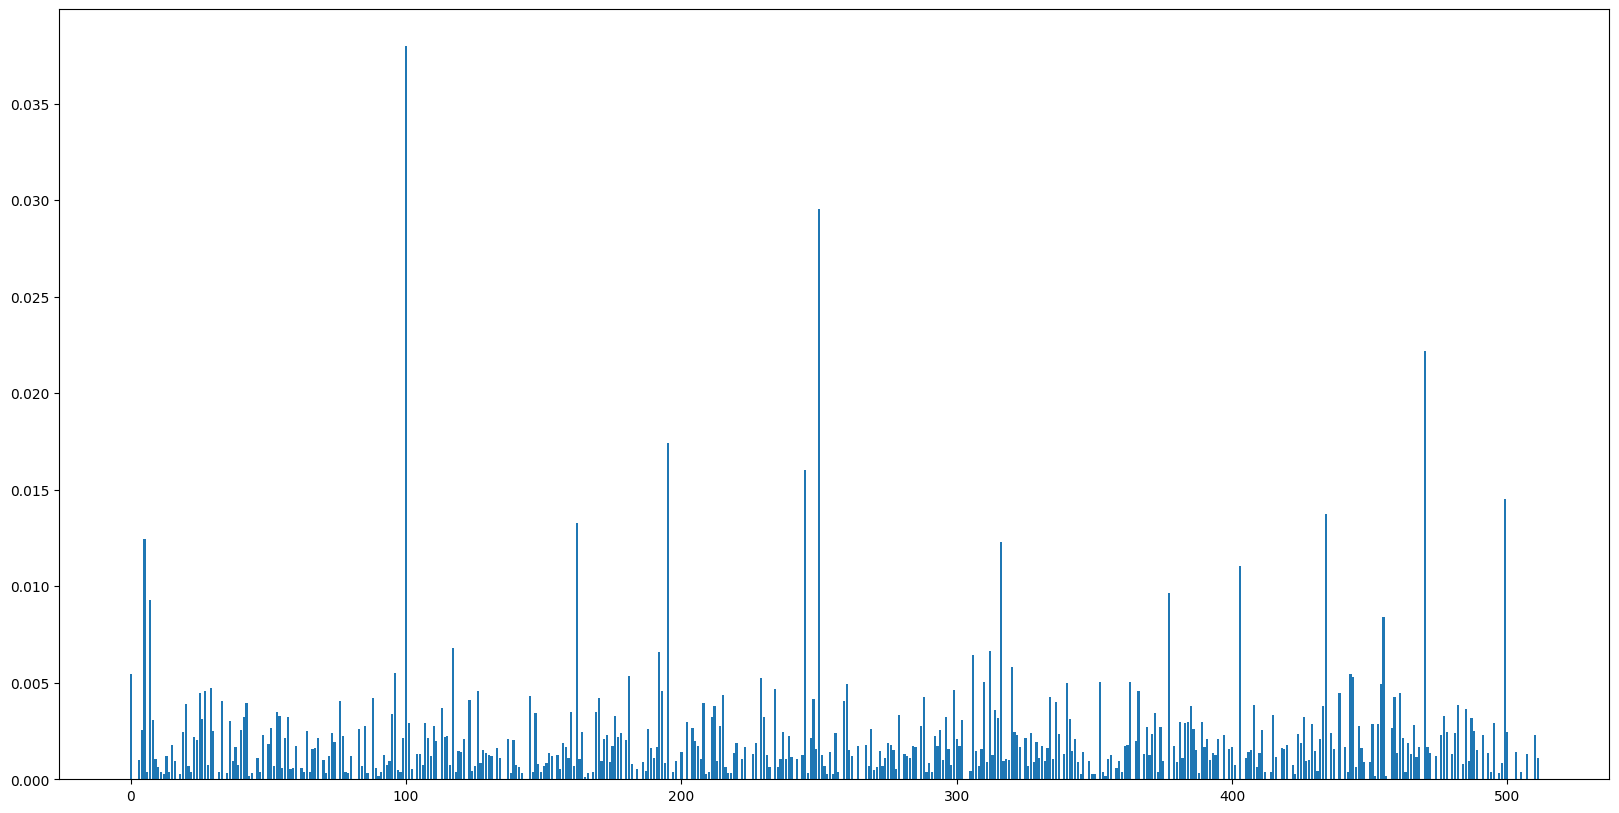

In [41]:
len(results[0]["importances"])

# plot the importances
plt.figure(figsize=(20,10))
plt.bar(range(len(results[0]["importances"])), results[0]["importances"])

In [39]:
# print the 10 most important features
indices = np.argsort(results[0]["importances"])[::-1]
for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], results[i]["importances"][indices[f]]))

print([int(ind) for ind in indices[:10]])

1. feature 100 (0.004242)
2. feature 250 (0.010856)
3. feature 470 (0.003462)
4. feature 195 (0.021118)
5. feature 245 (0.036454)
6. feature 499 (0.005407)
7. feature 434 (0.008801)
8. feature 162 (0.019093)
9. feature 5 (0.007376)
10. feature 316 (0.007058)
[100, 250, 470, 195, 245, 499, 434, 162, 5, 316]


Experiment 1:

Most important features: [100, 250, 470, 195, 245, 499, 434, 162, 5, 316]
Precision: 0.5983805668016194
Recall: 0.5930979133226324
F1 score: 0.5957275292220878
Accuracy: 0.6212235649546828


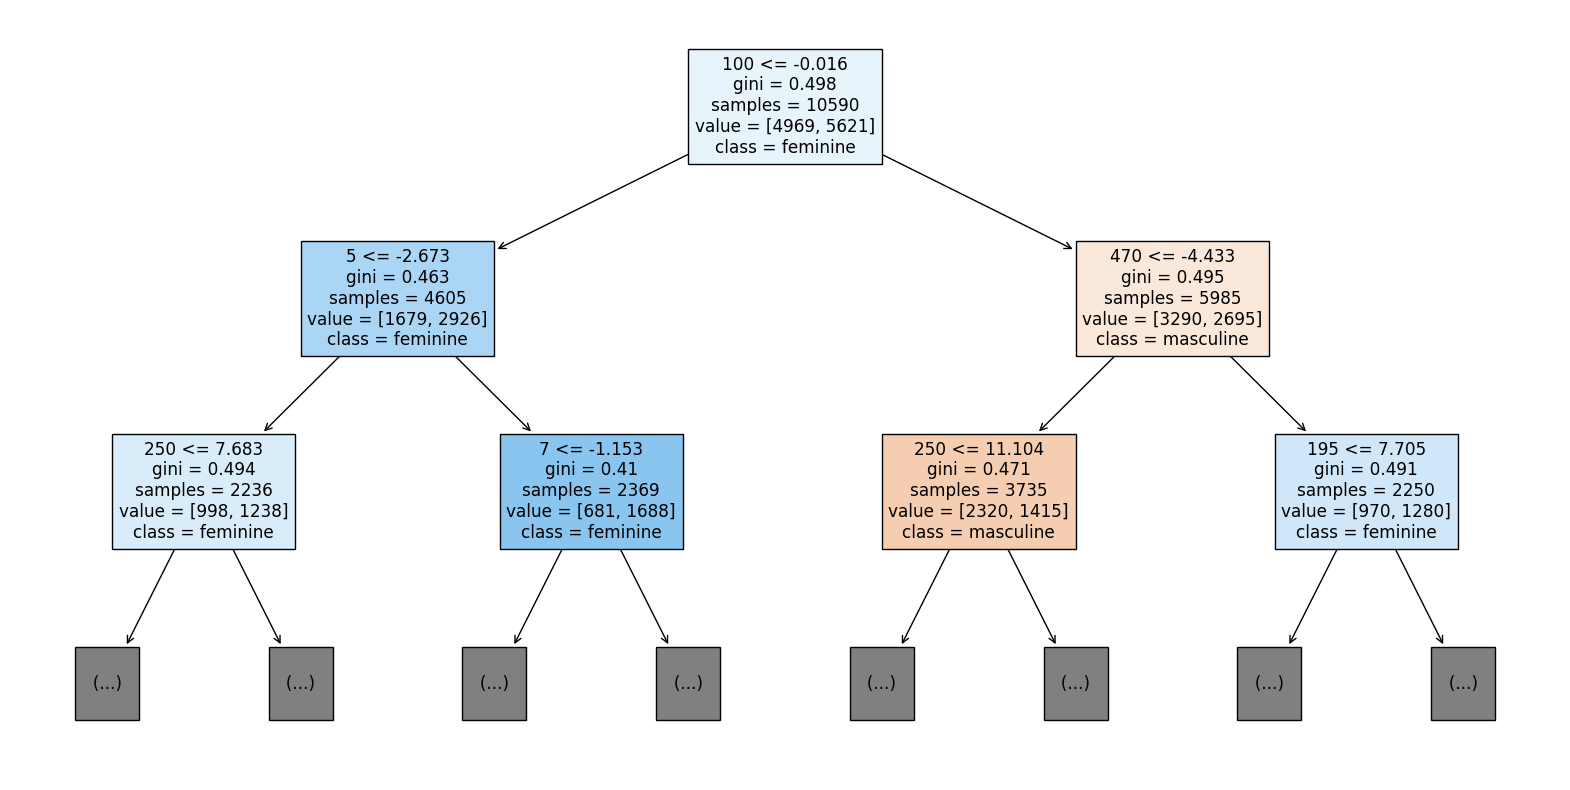

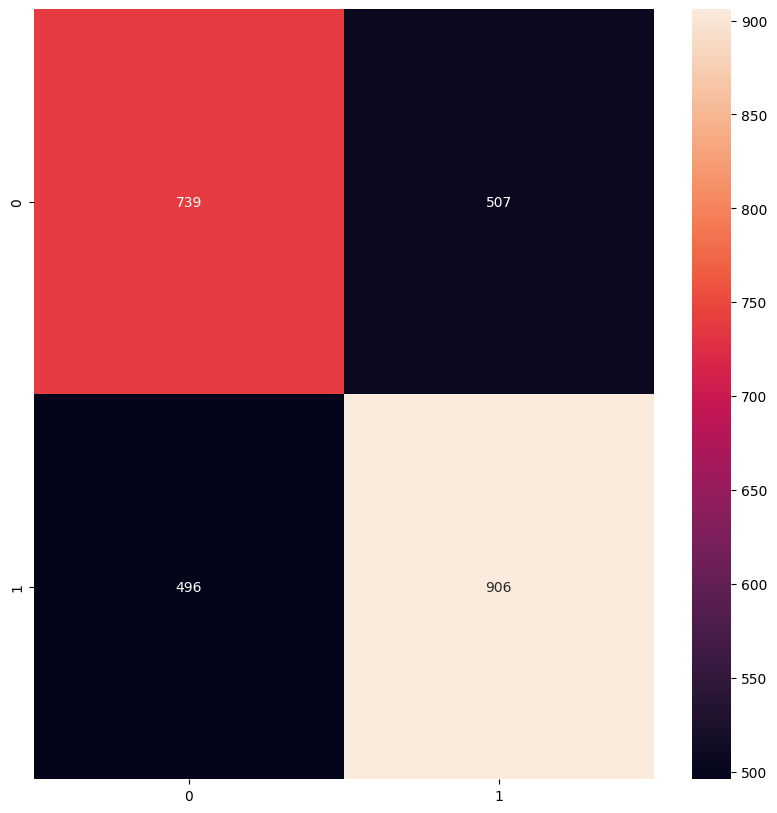

Experiment 2:

Most important features: [466, 5, 507, 57, 234, 250, 379, 390, 511, 432]
Precision: 0.659877800407332
Recall: 0.6849894291754757
F1 score: 0.6721991701244814
Accuracy: 0.7505919494869772


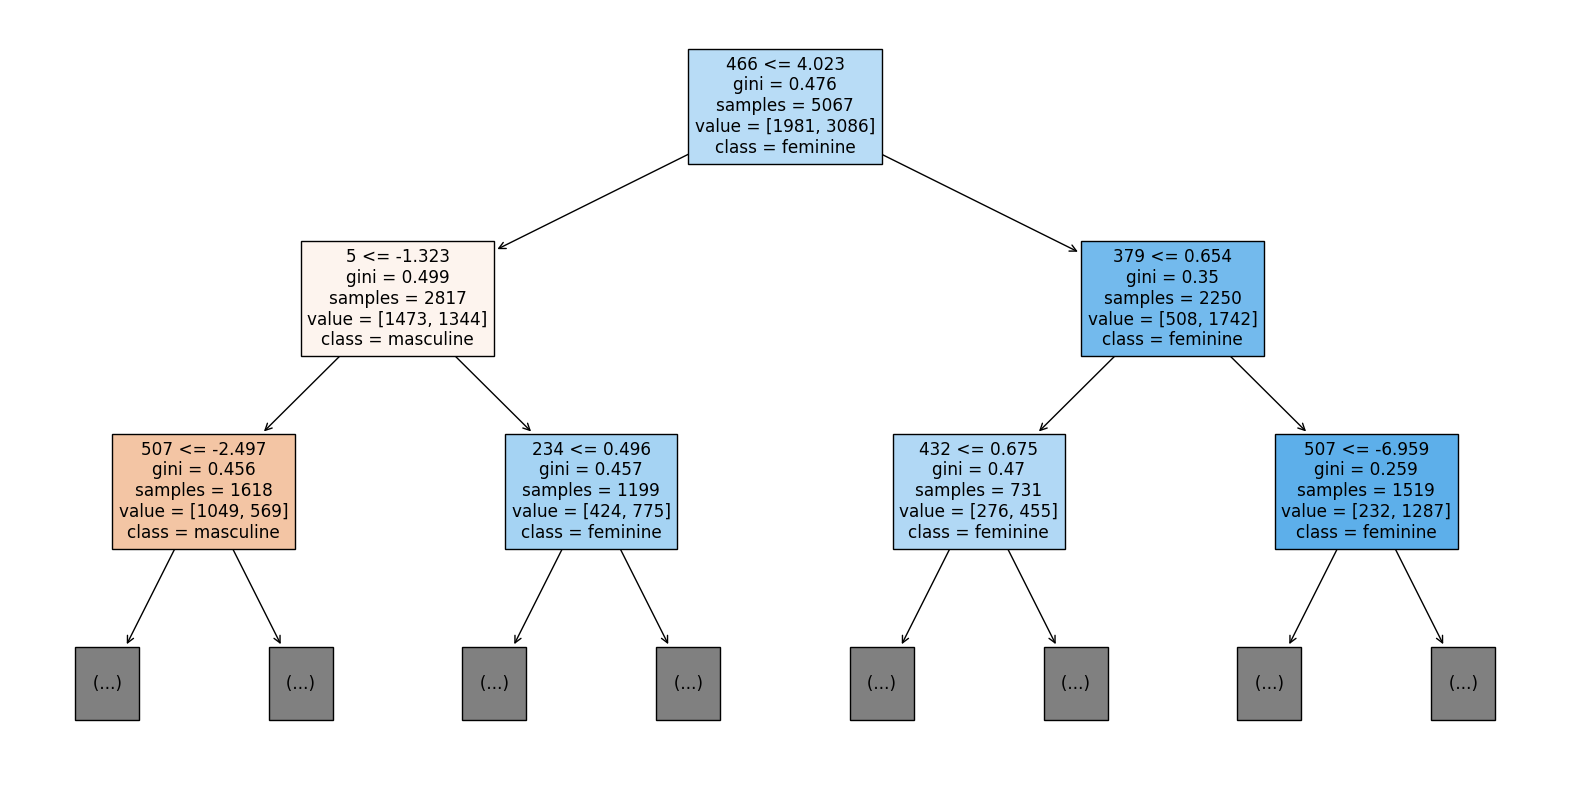

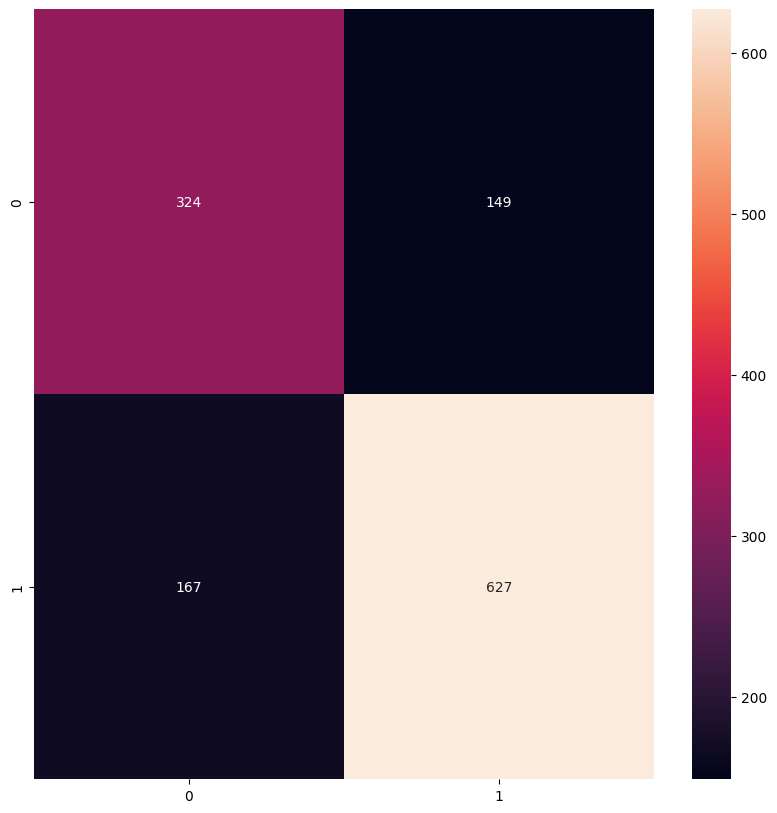

Experiment 3:

Most important features: [245, 192, 195, 377, 162, 507, 133, 117, 121, 487]
Precision: 0.6875732708089097
Recall: 0.6883802816901409
F1 score: 0.6879765395894429
Accuracy: 0.7282247765006385


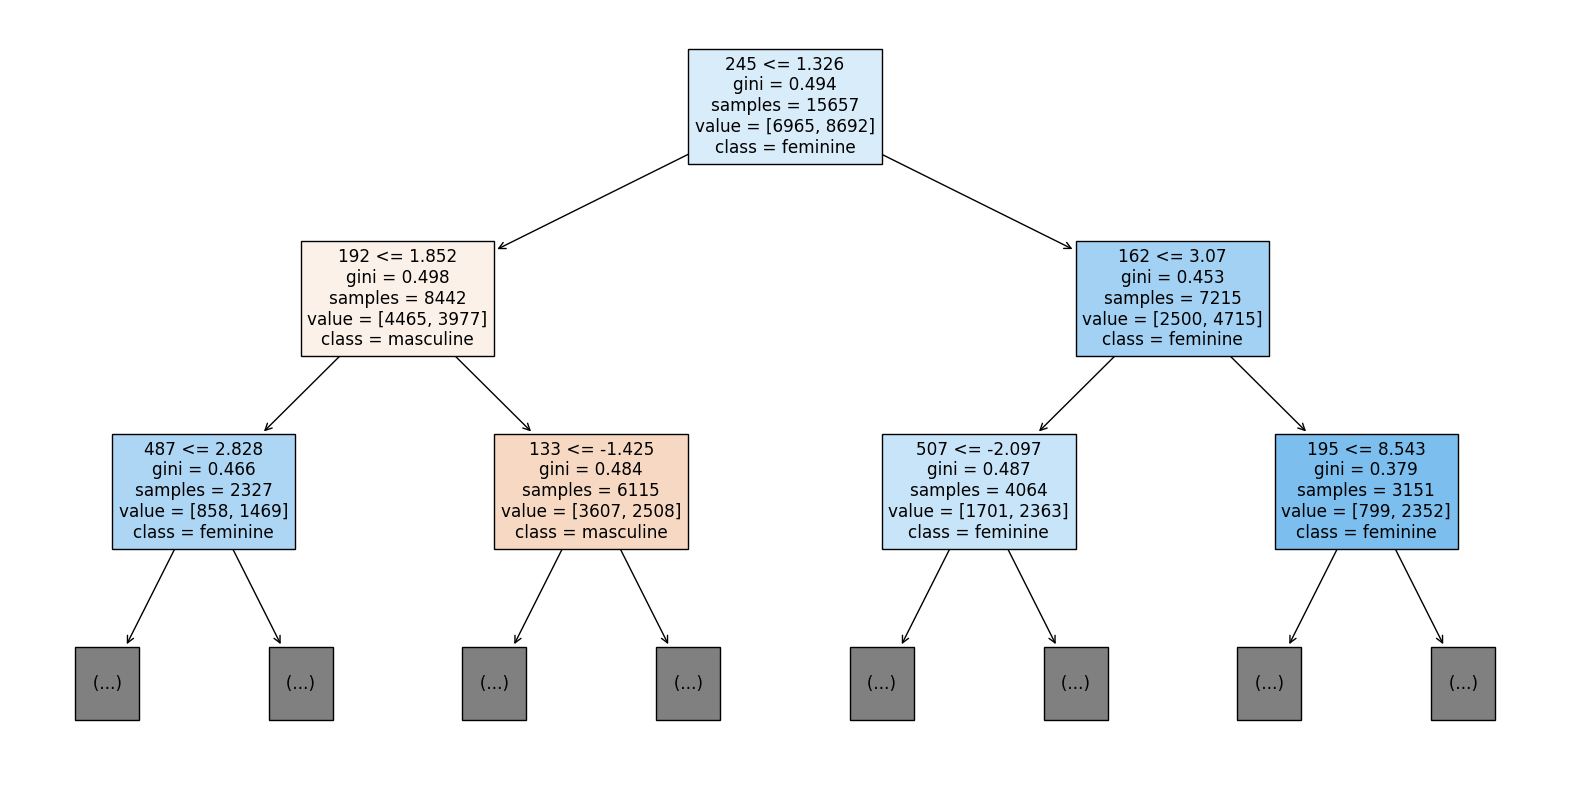

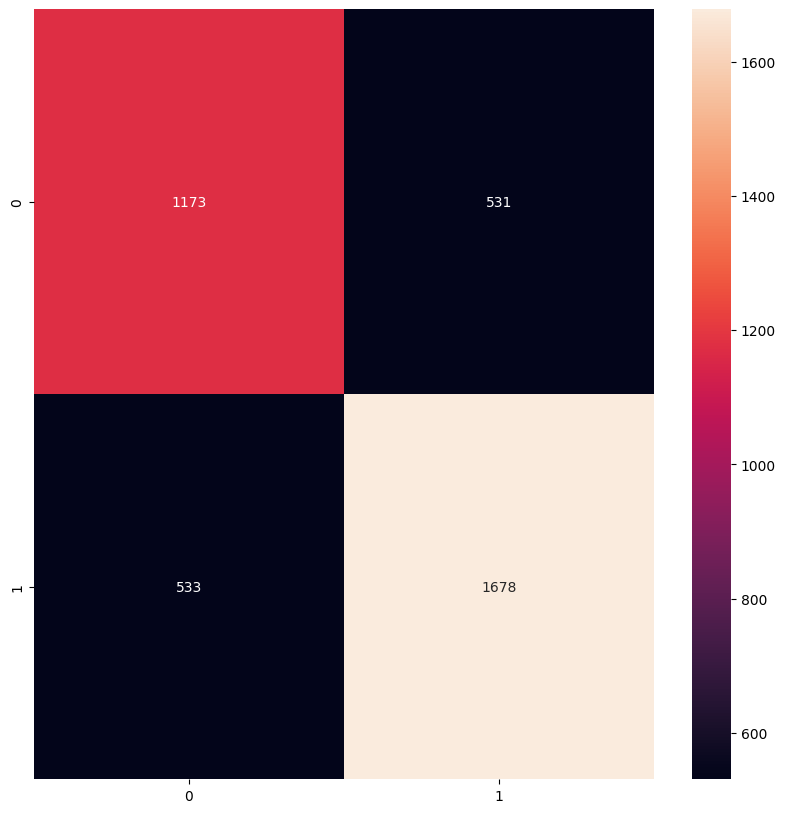

In [34]:
for i in range(3):

    print(f"Experiment {i+1}:\n")

    # Plot top 10 most important features
    indices = np.argsort(results[i]["importances"])[::-1]
    print(f"Most important features: {[int(ind) for ind in indices[:10]]}")

    # Plot precision, recall, F1 score and accuracy
    print(f"Precision: {results[i]['precision']}")
    print(f"Recall: {results[i]['recall']}")
    print(f"F1 score: {results[i]['f1']}")
    print(f"Accuracy: {results[i]['accuracy']}")

    # Plot the tree
    plt.figure(figsize=(20,10))
    plot_tree(results[i]["tree"], max_depth=2, feature_names=X_gd_N.columns, class_names=["masculine", "feminine"], filled=True)
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(10,10))
    sns.heatmap(results[i]["cm"], annot=True, fmt="d")
    plt.show()

    

In [7]:
# Check if some important features are the same for multiple experiments

nouns = set(np.argsort(results[0]["importances"])[::-1][:10])
adj = set(np.argsort(results[1]["importances"])[::-1][:10])
both = set(np.argsort(results[2]["importances"])[::-1][:10])

nouns_and_ajd = nouns.intersection(adj)
nouns_and_both = nouns.intersection(both)
adj_and_both = adj.intersection(both)
all = nouns_and_ajd.intersection(both)

print(f"nouns and adj: {nouns_and_ajd}")
print(f"nouns and both: {nouns_and_both}")
print(f"adj and both: {adj_and_both}")
print(f"all: {all}")

nouns and adj: {250, 5}
nouns and both: {162, 195, 245}
adj and both: {507}
all: set()


#### 2. Random Forest

In [8]:
# Do the same with Random Forest Classifier
# Execution time: ~ 2.15 min
results_rf = []

for i in range(3):

    X_train, X_test, Y_train, Y_test = train_features[i], test_features[i], train_targets[i], test_targets[i]

    # Build a random forest classifier with 100 trees
    clf = RandomForestClassifier(random_state=42, n_estimators=100)
    clf.fit(X_train, Y_train)

    # Predict gender on the test set
    Y_pred = clf.predict(X_test)

    # Build a confusion matrix
    results_rf.append ({"cm": confusion_matrix(Y_test, Y_pred)})

    # Compute precision, recall, F1 score and accuracy
    results_rf[i]["precision"] = results_rf[i]["cm"][0,0] / (results_rf[i]["cm"][0,0] + results_rf[i]["cm"][1,0])
    results_rf[i]["recall"] = results_rf[i]["cm"][0,0] / (results_rf[i]["cm"][0,0] + results_rf[i]["cm"][0,1])
    results_rf[i]["f1"] = 2 * results_rf[i]["precision"] * results_rf[i]["recall"] / (results_rf[i]["precision"] + results_rf[i]["recall"])
    results_rf[i]["accuracy"] = (results_rf[i]["cm"][0,0] + results_rf[i]["cm"][1,1]) / np.sum(results_rf[i]["cm"])

    # Store the importance of each feature
    results_rf[i]["importances"] = clf.feature_importances_
    

Experiment 1:

Most important features: [100, 245, 195, 316, 192, 403, 377, 507, 117, 121]
Precision: 0.8215962441314554
Recall: 0.702247191011236
F1 score: 0.7572479446127217
Accuracy: 0.7881419939577039


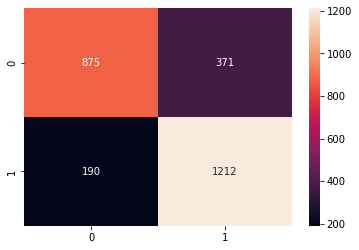

Experiment 2:

Most important features: [466, 503, 250, 439, 245, 133, 234, 121, 432, 38]
Precision: 0.9670886075949368
Recall: 0.8076109936575053
F1 score: 0.880184331797235
Accuracy: 0.9179163378058406


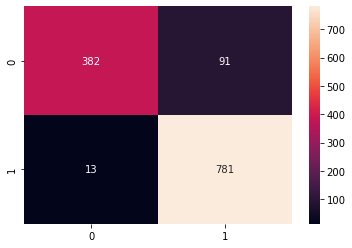

Experiment 3:

Most important features: [245, 507, 192, 121, 250, 195, 377, 5, 466, 133]
Precision: 0.8794373744139317
Recall: 0.7705399061032864
F1 score: 0.8213950578667499
Accuracy: 0.8541507024265645


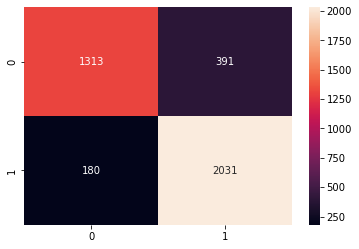

In [9]:
for i in range(3):

    print(f"Experiment {i+1}:\n")

    # Plot top 10 most important features
    indices = np.argsort(results_rf[i]["importances"])[::-1]
    print(f"Most important features: {[int(ind) for ind in indices[:10]]}")

    # Plot precision, recall, F1 score and accuracy
    print(f"Precision: {results_rf[i]['precision']}")
    print(f"Recall: {results_rf[i]['recall']}")
    print(f"F1 score: {results_rf[i]['f1']}")
    print(f"Accuracy: {results_rf[i]['accuracy']}")

    # Plot confusion matrix
    sns.heatmap(results_rf[i]["cm"], annot=True, fmt="d")
    plt.show()


In [10]:
# Check if some important features are the same for multiple experiments

nouns = set(np.argsort(results_rf[0]["importances"])[::-1][:10])
adj = set(np.argsort(results_rf[1]["importances"])[::-1][:10])
both = set(np.argsort(results_rf[2]["importances"])[::-1][:10])

nouns_and_ajd = nouns.intersection(adj)
nouns_and_both = nouns.intersection(both)
adj_and_both = adj.intersection(both)
all = nouns_and_ajd.intersection(both)

print(f"nouns and adj: {nouns_and_ajd}")
print(f"nouns and both: {nouns_and_both}")
print(f"adj and both: {adj_and_both}")
print(f"all: {all}")

nouns and adj: {121, 245}
nouns and both: {192, 121, 195, 245, 377, 507}
adj and both: {133, 466, 245, 121, 250}
all: {121, 245}


#### 3. Logistic Regression

In [43]:
results = []

for i in range(3):
    
    X_train, X_test, Y_train, Y_test = train_features[i], test_features[i], train_targets[i], test_targets[i]

    # define a Logistic Regression model
    clf = LogisticRegression(random_state=42, max_iter=1000)

    # fit the model to the train set
    clf.fit(X_train, Y_train)

    # predict the test set
    Y_pred = clf.predict(X_test)

    # Build a confusion matrix
    results.append ({"cm": confusion_matrix(Y_test, Y_pred)})

    # Compute precision, recall, F1 score and accuracy
    results[i]["precision"] = results[i]["cm"][0,0] / (results[i]["cm"][0,0] + results[i]["cm"][1,0])
    results[i]["recall"] = results[i]["cm"][0,0] / (results[i]["cm"][0,0] + results[i]["cm"][0,1])
    results[i]["f1"] = 2 * results[i]["precision"] * results[i]["recall"] / (results[i]["precision"] + results[i]["recall"])
    results[i]["accuracy"] = (results[i]["cm"][0,0] + results[i]["cm"][1,1]) / np.sum(results[i]["cm"])
   
    # Store the importance of each feature
    results[i]["importances"] = clf.coef_[0]

c:\Users\bleuze3u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bleuze3u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

-0.6065532291496353


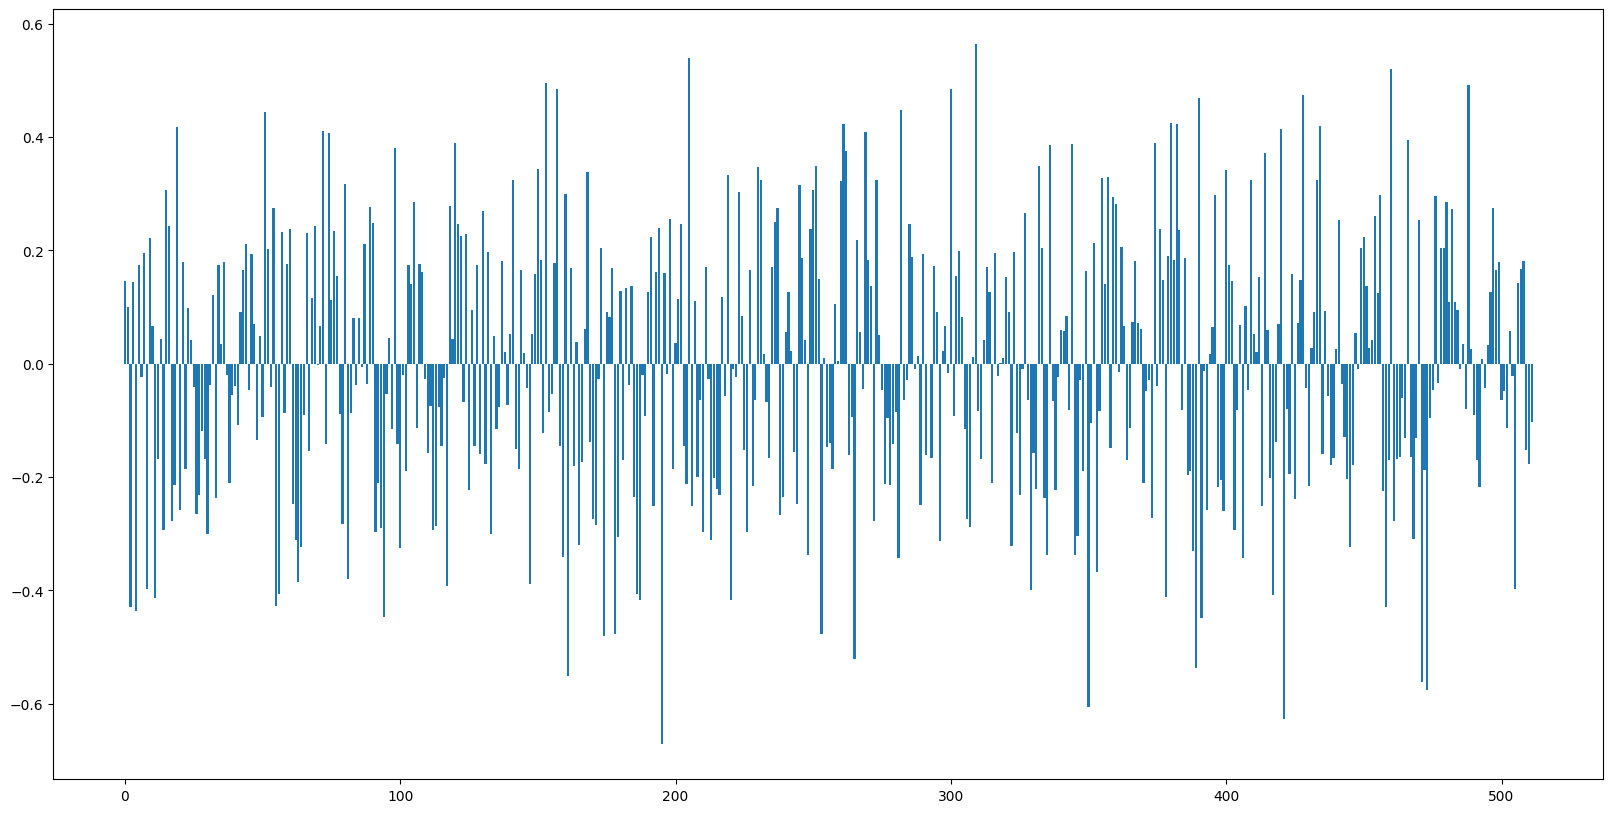

In [49]:
importances_1 = results[0]["importances"]
# plot the importances
plt.figure(figsize=(20,10))
plt.bar([x for x in range(len(importances_1))], importances_1)
print(importances_1[350])

In [46]:
indices = np.argsort(abs(results[0]["importances"]))[::-1]
print(f"Most important features: {[int(ind) for ind in indices[:10]]}")

Most important features: [195, 421, 350, 473, 309, 471, 161, 205, 389, 265]


Experiment 1:

Most important features: [195, 421, 350, 473, 309, 471, 161, 205, 389, 265]
Precision: 0.9403815580286169
Recall: 0.949438202247191
F1 score: 0.9448881789137381
Accuracy: 0.9478851963746223


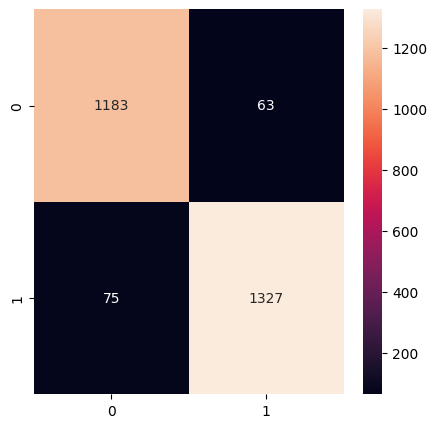

Experiment 2:

Most important features: [121, 175, 288, 181, 195, 162, 89, 211, 214, 88]
Precision: 0.9894291754756871
Recall: 0.9894291754756871
F1 score: 0.9894291754756871
Accuracy: 0.9921073401736386


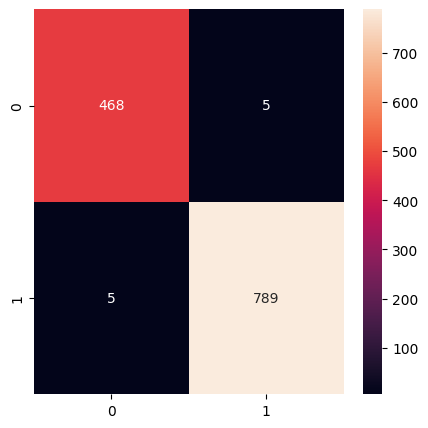

Experiment 3:

Most important features: [350, 195, 421, 309, 482, 237, 269, 4, 261, 428]
Precision: 0.9598583234946871
Recall: 0.954225352112676
F1 score: 0.9570335491465568
Accuracy: 0.9627075351213282


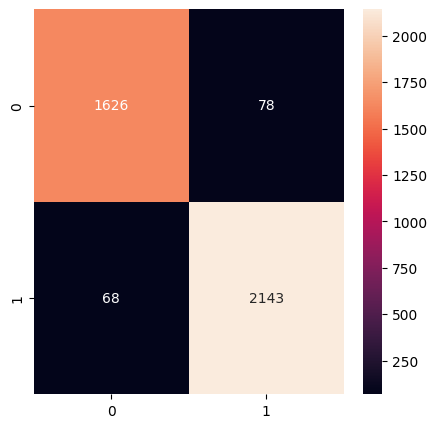

In [52]:
for i in range(3):

    print(f"Experiment {i+1}:\n")
    
    # Plot top 10 most important features
    indices = np.argsort(abs(results[i]["importances"]))[::-1]
    print(f"Most important features: {[int(ind) for ind in indices[:10]]}")

    # Plot precision, recall, F1 score and accuracy
    print(f"Precision: {results[i]['precision']}")
    print(f"Recall: {results[i]['recall']}")
    print(f"F1 score: {results[i]['f1']}")
    print(f"Accuracy: {results[i]['accuracy']}")
    
    # Plot confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(results[i]["cm"], annot=True, fmt="d")
    plt.show()


# Number

In [54]:
df_nouns_nb = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv').drop(columns=["gender"])
df_adj_nb = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv').drop(columns=["gender"])
df_both_nb = pd.concat([df_nouns_nb, df_adj_nb], ignore_index=True)

# assign -1 for singular and 1 for plural
df_nouns_nb.loc[df_nouns_nb['number']=="singular",'num']=-1
df_nouns_nb.loc[df_nouns_nb['number']=="plural",'num']=1

df_adj_nb.loc[df_adj_nb['number']=="singular",'num']=-1
df_adj_nb.loc[df_adj_nb['number']=="plural",'num']=1


df_both_nb.loc[df_both_nb['number']=="singular",'num']=-1
df_both_nb.loc[df_both_nb['number']=="plural",'num']=1


# target : number

Y_nb_N = df_nouns_nb["num"]
Y_nb_A = df_adj_nb["num"]
Y_nb_both = df_both_nb["num"]

# features : word embeddings dimensions
X_nb_N = df_nouns_nb.drop(columns=["Word", "number", "num"])
X_nb_A = df_adj_nb.drop(columns=["Word", "number", "num"])
X_nb_both = df_both_nb.drop(columns = ["Word","number", "num"] )

# split data into train and test sets
X_nb_N_train, X_nb_N_test, Y_nb_N_train, Y_nb_N_test = train_test_split(X_nb_N, Y_nb_N, test_size=0.2, random_state=42)
X_nb_A_train, X_nb_A_test, Y_nb_A_train, Y_nb_A_test = train_test_split(X_nb_A, Y_nb_A, test_size=0.2, random_state=42)
X_nb_both_train, X_nb_both_test, Y_nb_both_train, Y_nb_both_test = train_test_split(X_nb_both, Y_nb_both, test_size=0.2, random_state=42)

In [55]:
train_nb_features = [X_nb_N_train, X_nb_A_train, X_nb_both_train]
test_nb_features = [X_nb_N_test, X_nb_A_test, X_nb_both_test]
train_nb_targets = [Y_nb_N_train, Y_nb_A_train, Y_nb_both_train]
test_nb_targets = [Y_nb_N_test, Y_nb_A_test, Y_nb_both_test]

# LogisticRegression

Experiment 1:



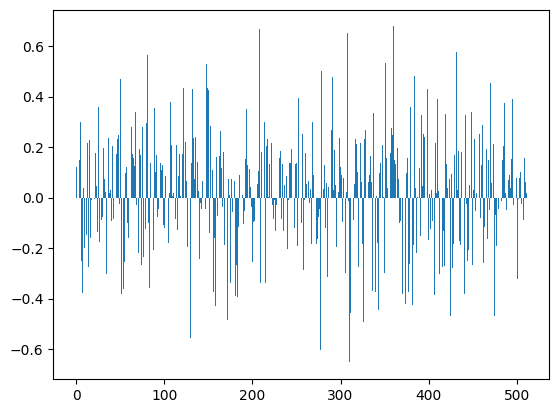

    Dimension  Importance  Abs_importance
360       360    0.677908        0.677908
208       208    0.668645        0.668645
338       338    0.655633        0.655633
310       310   -0.652786        0.652786
308       308    0.650348        0.650348
52         52   -0.604107        0.604107
277       277   -0.603795        0.603795
432       432    0.577367        0.577367
81         81    0.563135        0.563135
130       130   -0.557335        0.557335
Experiment 2:



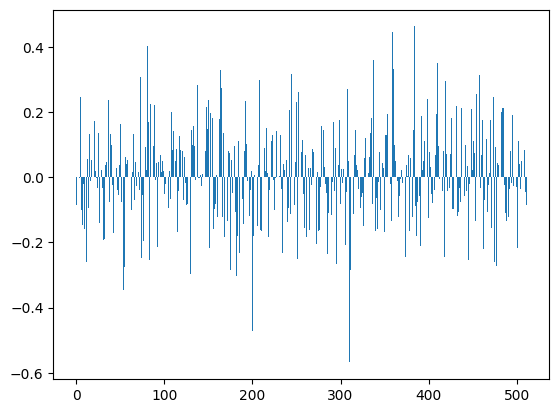

    Dimension  Importance  Abs_importance
310       310   -0.568427        0.568427
200       200   -0.473041        0.473041
384       384    0.463226        0.463226
359       359    0.447780        0.447780
81         81    0.401893        0.401893
337       337    0.359486        0.359486
410       410    0.351717        0.351717
54         54   -0.346219        0.346219
422       422   -0.344721        0.344721
356       356    0.343770        0.343770


In [59]:
for t in range(3):
    
    X_train, X_test, Y_train, Y_test = train_nb_features[t], test_nb_features[t], train_nb_targets[t], test_nb_targets[t]

# define the model
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
# fit the model
    model.fit(X_train, Y_train)
# get importance
    importance = model.coef_[0]
    
# summarize feature importance
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
    
    print(f"Experiment {t+1}:\n")
    
    
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    importances = pd.DataFrame(data={'Dimension': X_train.columns,'Importance': model.coef_[0], 'Abs_importance': abs(model.coef_[0])})
    importances = importances.sort_values(by='Abs_importance', ascending=False)
    print(importances.head(10))

 

# K Neighbors Classifier

Experiment 1:



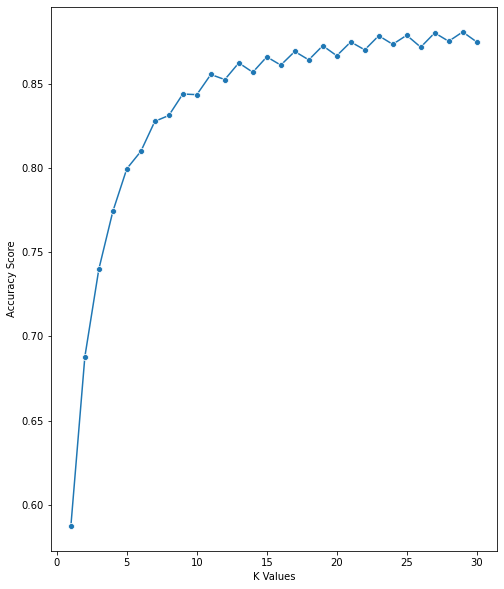

Experiment 2:



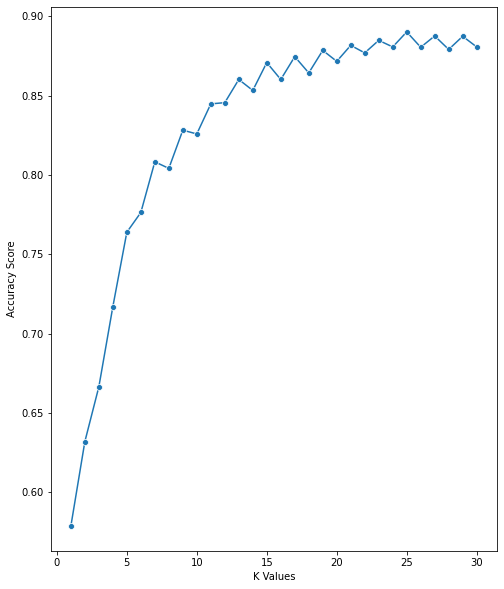

Experiment 3:



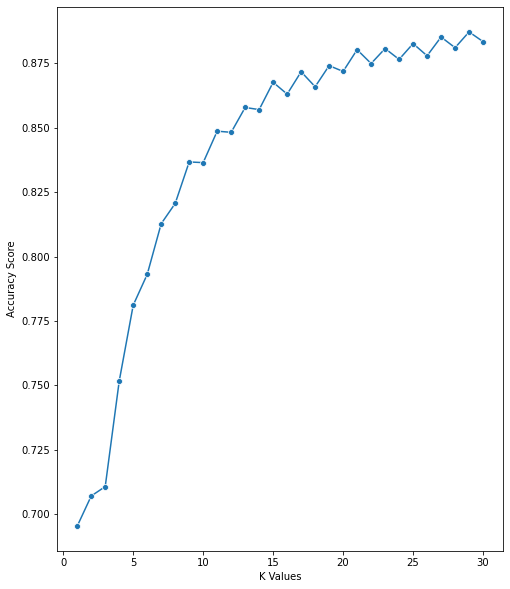

In [403]:
# Using Cross Validation to Get the Best Value of k
for t in range(3):
    
    X_train, X_test, Y_train, Y_test = train_nb_features[t], test_nb_features[t], train_nb_targets[t], test_nb_targets[t]

    k_values = [i for i in range (1,31)]
    scores = []

    scaler = StandardScaler()
    X = scaler.fit_transform( X_train)

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(knn, X_train, Y_train, cv=5)
        scores.append(np.mean(score))

   
    print(f"Experiment {t+1}:\n")
    
    sns.lineplot(x = k_values, y = scores, marker = 'o')
    plt.xlabel("K Values")
    plt.ylabel("Accuracy Score")

    plt.show()
     
    

In [423]:
#Fitting and Evaluating the Model

# for noun the best_k is 15
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_nb_N_train, Y_nb_N_train)

y_pred = knn.predict(X_nb_N_test)

accuracy = accuracy_score(Y_nb_N_test, y_pred)
precision = precision_score(Y_nb_N_test, y_pred)
recall = recall_score(Y_nb_N_test, y_pred)

print("Accuracy for noun:", accuracy)
print("Precision for noun:", precision)
print("Recalln for noun :", recall)


# perform permutation importance
results = permutation_importance(knn, X_nb_N_train, Y_nb_N_train, scoring='accuracy')
# get importance
importance = results.importances_mean

#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()
print("--"*30)

Accuracy for noun: 0.875
Precision for noun: 0.85995085995086
Recalln for noun : 0.7633587786259542
------------------------------------------------------------


In [427]:
importances = pd.DataFrame(data={'Dimension': X_nb_N_train.columns,'Importance': results.importances_mean})
importances = importances.sort_values(by='Importance', ascending=False)
importances.head(10)

,Dimension,Importance
250,250,0.002493
384,384,0.002474
67,67,0.002285
371,371,0.002247
254,254,0.002096
155,155,0.002059
461,461,0.001926
310,310,0.001889
25,25,0.001832
172,172,0.001832


In [429]:

# for adj the best_k is 25

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_nb_A_train, Y_nb_A_train)

y_pred = knn.predict(X_nb_A_test)

accuracy = accuracy_score(Y_nb_A_test, y_pred)
precision = precision_score(Y_nb_A_test, y_pred)
recall = recall_score(Y_nb_A_test, y_pred)



print("Accuracy for adj:", accuracy)
print("Precision for adj:", precision)
print("Recalln for adj :", recall)


print("--"*30)

# for noun and adj the best_k is 27

knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_nb_both_train, Y_nb_both_train)

y_pred = knn.predict(X_nb_both_test)

accuracy = accuracy_score(Y_nb_both_test, y_pred)
precision = precision_score(Y_nb_both_test, y_pred)
recall = recall_score(Y_nb_both_test, y_pred)

print("Accuracy for noun and adj:", accuracy)
print("Precision for noun and adj:", precision)
print("Recalln for noun and  adj :", recall)





Accuracy for adj: 0.9021310181531176
Precision for adj: 0.9195121951219513
Recalln for adj : 0.8055555555555556
------------------------------------------------------------
Accuracy for noun and adj: 0.8929757343550447
Precision for noun and adj: 0.8908507223113965
Recalln for noun and  adj : 0.7968413496051687


# Part of Speech

In [1]:
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.metrics import accuracy_score

In [17]:
df_n_pos_we = df_nouns_we.drop(columns=['gender'])
df_n_pos_we['pos'] = [1]* len(df_n_pos_we)

df_v_pos_we = pd.read_csv('../Data/FlauBERT_WE/all_verb_we.csv')
df_v_pos_we['pos'] = [0]* len(df_v_pos_we)

x_pos = pd.concat([df_n_pos_we, df_v_pos_we], ignore_index=True).drop(columns=['Word'])
x_pos = shuffle(x_pos)
y_pos = x_pos.pos.tolist()
x_pos = np.asarray(x_pos.drop(columns=['pos']))

In [18]:
x_pos_train, x_pos_test, y_pos_train, y_pos_test = train_test_split(x_pos[:3000], y_pos[:3000], train_size=0.8)

### Logistic regression

In [20]:
pos_lr_clf = LogisticRegression(random_state=0).fit(x_pos_train, y_pos_train)

/Users/egoliakova/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
pos_lr_y_pred = pos_lr_clf.predict(x_pos_test)

In [23]:
print(accuracy_score(y_pos_test, pos_lr_y_pred))

0.74


In [29]:
sorted(enumerate(pos_lr_clf.coef_[0]), key=lambda x: x[1], reverse=True)

[(252, 0.45285151164699927),
 (192, 0.43360280649157595),
 (334, 0.37237409516728603),
 (494, 0.36358396108064533),
 (507, 0.33307185299926045),
 (377, 0.32732350931037457),
 (381, 0.3138680664329623),
 (126, 0.3062060585599453),
 (92, 0.3032865784808164),
 (385, 0.2894434098655731),
 (196, 0.28172355813979255),
 (275, 0.272006809335591),
 (452, 0.2699396199726168),
 (391, 0.26166167597257217),
 (354, 0.2605123302909949),
 (16, 0.2583154686658771),
 (14, 0.25712625487792184),
 (202, 0.25620542965574716),
 (66, 0.24614339920877357),
 (248, 0.24577626267052927),
 (294, 0.24062562422192438),
 (62, 0.23960755195244532),
 (259, 0.23713482543000253),
 (31, 0.23552212128673944),
 (107, 0.2322043181361488),
 (59, 0.2312854902923894),
 (123, 0.23054125942352033),
 (457, 0.22546913301822044),
 (463, 0.22486668891431802),
 (10, 0.2222415105933907),
 (491, 0.21976522613545046),
 (501, 0.21757763218028917),
 (410, 0.2148159282789122),
 (71, 0.21286151503129974),
 (165, 0.21187880526952774),
 (41, 0

### SVM

In [7]:
clf = svm.SVC(kernel='linear')

In [8]:
clf.fit(x_pos_train, y_pos_train)

SVC(kernel='linear')

In [9]:
y_pred = clf.predict(x_pos_test)
print(accuracy_score(y_pos_test, y_pred))

0.7483333333333333


In [16]:
sorted(enumerate(clf.coef_[0]), key=lambda x: x[1], reverse=True)

[(417, 0.5409311301562476),
 (258, 0.4847646425630199),
 (431, 0.4429072137082253),
 (280, 0.4373269106959907),
 (139, 0.39972676509410565),
 (445, 0.39695378487091215),
 (113, 0.38892903899776843),
 (77, 0.3666468198952657),
 (216, 0.35497250477844844),
 (455, 0.35024419710801524),
 (388, 0.34912167704625596),
 (135, 0.3385003339589021),
 (186, 0.33735766529935507),
 (132, 0.3285316077556202),
 (227, 0.3227843250228677),
 (474, 0.317719218417436),
 (393, 0.3163424382161031),
 (369, 0.3141469998216171),
 (494, 0.3097163585900251),
 (464, 0.3025802689073247),
 (93, 0.2991925619032477),
 (241, 0.28884517996889625),
 (416, 0.2852573111786567),
 (234, 0.2852298720544644),
 (467, 0.28371701197887056),
 (145, 0.2823493837626818),
 (96, 0.2822563863153098),
 (423, 0.2818033983664705),
 (501, 0.2786039779637317),
 (100, 0.27323758519879715),
 (302, 0.2704470341422911),
 (303, 0.26986809517392985),
 (67, 0.2696932299497261),
 (40, 0.26910581010022216),
 (251, 0.2685945060036845),
 (331, 0.26831

Comment: SVM runs extremely slowly and without cutting the dataset to a smaller pieces takes too long to run.
The complexity [can be](https://datascience.stackexchange.com/questions/989/svm-using-scikit-learn-runs-endlessly-and-never-completes-execution) quadratic.

Weights of SVM [can be used for feature ranking](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.70.9598&rep=rep1&type=pdf), however, since we can't efficiently run it on the dataset we don't know if the produced results are accurate enough.

# Neural Network classifier

In [17]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics


### Part of speech

In [100]:
x_pos_train, x_pos_test, y_pos_train, y_pos_test = train_test_split(x_pos, y_pos, train_size=0.8)

In [101]:
# split an additional validation dataset
x_validation = x_pos_train[:1000]
x_partial_train = x_pos_train[1000:]
y_validation = y_pos_train[:1000]
y_partial_train = y_pos_train[1000:]

In [106]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(512,)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [107]:
model.fit(x_partial_train, y_partial_train, epochs=4, batch_size=512 ,validation_data=(x_validation, y_validation))
print("score on test: " + str(model.evaluate(x_pos_test, y_pos_test)[1]))
print("score on train: "+ str(model.evaluate(x_pos_train, y_pos_train)[1]))

Epoch 1/4
35/35 [==============================] - 1s 8ms/step - loss: 0.5532 - accuracy: 0.7253 - val_loss: 0.4915 - val_accuracy: 0.7790
Epoch 2/4
35/35 [==============================] - 0s 4ms/step - loss: 0.4717 - accuracy: 0.7964 - val_loss: 0.4408 - val_accuracy: 0.8080
Epoch 3/4
35/35 [==============================] - 0s 4ms/step - loss: 0.4483 - accuracy: 0.8059 - val_loss: 0.4592 - val_accuracy: 0.7840
Epoch 4/4
146/146 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.7992
score on test: 0.799185574054718
584/584 [==============================] - 1s 976us/step - loss: 0.4205 - accuracy: 0.8145
score on train: 0.8145230412483215


In [125]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 16)                8208      
                                                                 
 dense_52 (Dense)            (None, 512)               8704      
                                                                 
 dense_53 (Dense)            (None, 1)                 513       
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [108]:
sorted(enumerate(np.asarray(model.layers[2].weights[0])), key=lambda x: x[1], reverse=True)

[(297, array([0.12163994], dtype=float32)),
 (402, array([0.12039344], dtype=float32)),
 (351, array([0.11420713], dtype=float32)),
 (324, array([0.11387264], dtype=float32)),
 (178, array([0.1113931], dtype=float32)),
 (445, array([0.11082896], dtype=float32)),
 (155, array([0.11074799], dtype=float32)),
 (25, array([0.11038055], dtype=float32)),
 (229, array([0.11007375], dtype=float32)),
 (190, array([0.10988786], dtype=float32)),
 (84, array([0.10858683], dtype=float32)),
 (384, array([0.10766837], dtype=float32)),
 (433, array([0.1073969], dtype=float32)),
 (440, array([0.10619191], dtype=float32)),
 (295, array([0.10595679], dtype=float32)),
 (18, array([0.10356557], dtype=float32)),
 (120, array([0.10279904], dtype=float32)),
 (212, array([0.10218962], dtype=float32)),
 (12, array([0.10137595], dtype=float32)),
 (143, array([0.10040676], dtype=float32)),
 (435, array([0.09856194], dtype=float32)),
 (457, array([0.09845425], dtype=float32)),
 (20, array([0.09812693], dtype=float3

Can the weights be attributed to the dimension?

# Random forest

### Part of speech 

In [121]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=60, max_depth=9)

In [122]:
rf.fit(x_pos_train, y_pos_train)
print("score on test: " + str(rf.score(x_pos_test, y_pos_test)))
print("score on train: "+ str(rf.score(x_pos_train, y_pos_train)))

score on test: 0.7537505357908273
score on train: 0.847588424437299


In [123]:
sorted(enumerate(np.asarray(rf.feature_importances_)), key=lambda x: x[1], reverse=True)

[(480, 0.038346231279515544),
 (159, 0.03493922462569707),
 (458, 0.024597661064683713),
 (310, 0.02424541149362095),
 (346, 0.019173789200295263),
 (341, 0.018461181201076253),
 (401, 0.018248255460852306),
 (192, 0.017001016245957727),
 (128, 0.015529468558993998),
 (29, 0.013545842752770753),
 (65, 0.01337117292773579),
 (305, 0.012715014446833657),
 (504, 0.012375727778835546),
 (409, 0.01237257664382202),
 (479, 0.011632846708457923),
 (374, 0.010029268252042584),
 (198, 0.009410576135894856),
 (362, 0.009263668817363022),
 (89, 0.008629212405998687),
 (31, 0.007321913209176185),
 (155, 0.007231274273057816),
 (378, 0.007147325073707478),
 (158, 0.006927281391111501),
 (393, 0.006786314755110686),
 (103, 0.006399778012522297),
 (185, 0.006317580583334805),
 (462, 0.006246731397365603),
 (57, 0.006221229268359195),
 (282, 0.0062183356697612605),
 (14, 0.006013723350192964),
 (168, 0.0059348334948712),
 (154, 0.005708186253188366),
 (207, 0.005667623656459511),
 (51, 0.0056019324983

This one actually gives similar results to clustering / correlation tests, however, feature importance are pretty low.